ABDEL NASER ABUZITAR 20190847 SE PROJECT CODE ID:28

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import numpy as np
import statsmodels.api as sm
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn import metrics
from sklearn import tree

In [2]:
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
ddos=pd.read_csv('/content/dataset_sdn.csv')

In [4]:
ddos = ddos.dropna(axis=1)

In [5]:
ddos.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'label'],
      dtype='object')

In [6]:
class_counts = ddos['label'].value_counts()
print(class_counts)

0    63561
1    40784
Name: label, dtype: int64


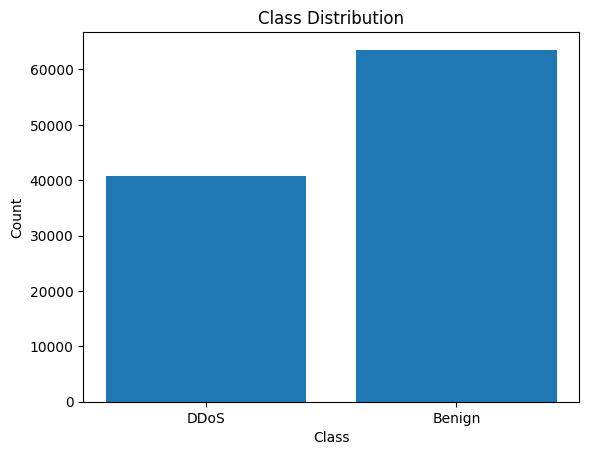

In [7]:
class_counts = [40784, 63561]
class_labels = ['DDoS', 'Benign']  # Replace with your actual class labels
plt.bar(class_labels, class_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Let's do feature Selection for the data before feeding it to the models

In [8]:
ddos = ddos.drop('src', axis=1)
ddos = pd.get_dummies(ddos)
X = ddos.drop('label', axis=1)
y = ddos['label']
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
if len(selected_indices) > 0:
    selected_features = X.columns[selected_indices]
    print(selected_features)
else:
    print("No features selected")

Index(['pktcount', 'bytecount', 'flows', 'Protocol_ICMP', 'Protocol_UDP'], dtype='object')


In [9]:
selected=['pktcount', 'bytecount', 'flows', 'Protocol_ICMP', 'Protocol_UDP','label']
ddos = ddos.loc[:, selected]

In [10]:
ddos.columns

Index(['pktcount', 'bytecount', 'flows', 'Protocol_ICMP', 'Protocol_UDP',
       'label'],
      dtype='object')

Splitting data to Train and Test-> 30% test, 70% training

In [18]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Before SMOTE:")
print(pd.Series(y).value_counts())
print("After SMOTE:")
print(pd.Series(y_resampled).value_counts())

Before SMOTE:
0    63561
1    40784
dtype: int64
After SMOTE:
0    63561
1    63561
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler

In [19]:
X = ddos.iloc[:, :-1].values
y = ddos.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Implementation of Random Forest

In [20]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
cmrf = confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Prescion:",metrics.precision_score(y_test, y_pred,pos_label=1))
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label=1))
print("Fmeasure:",metrics.f1_score(y_test, y_pred,pos_label=1))

Accuracy: 0.9980334058788054
Prescion: 0.9988897700237906
Recall: 0.9971500949968335
Fmeasure: 0.9980191743918865


Text(45.722222222222214, 0.5, 'True Negative/posive')

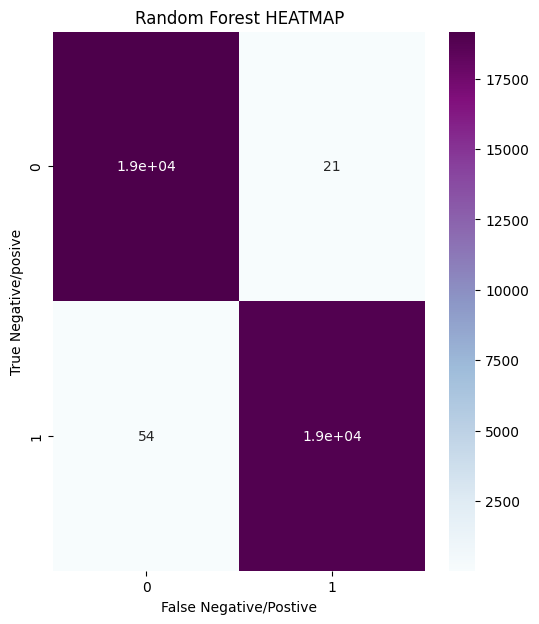

In [21]:
plt.figure(figsize = (6,7))
sns.heatmap(cmrf, annot=True,cmap="BuPu")
plt.title('Random Forest HEATMAP')
plt.xlabel('False Negative/Postive')
plt.ylabel('True Negative/posive')

Implementation of KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred4 = knn.predict(x_test)
print("accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("prescion:",metrics.precision_score(y_test, y_pred4,pos_label=1))
print("recall:",metrics.recall_score(y_test, y_pred4,pos_label=1))
print("fmeasure:",metrics.f1_score(y_test, y_pred4,pos_label=1))
cm=metrics.confusion_matrix(y_test, y_pred4)

accuracy: 0.9832183968324724
prescion: 0.9807773109243697
recall: 0.9855393709098585
fmeasure: 0.9831525744972096


Text(45.722222222222214, 0.5, 'True Negative/postive')

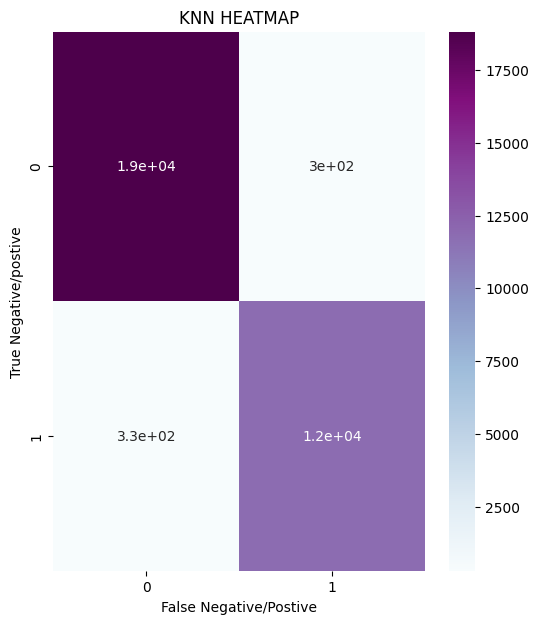

In [17]:
plt.figure(figsize = (6,7))
sns.heatmap(cm, annot=True,cmap="BuPu")
plt.title('KNN HEATMAP')
plt.xlabel('False Negative/Postive')
plt.ylabel('True Negative/postive')

Implementation of DTC

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_preddt= dt.predict(x_test)
cmdt = confusion_matrix(y_test, y_preddt)
print("Accuracy:",metrics.accuracy_score(y_test, y_preddt))
print("Prescion:",metrics.precision_score(y_test, y_preddt,pos_label=1))
print("Recall:",metrics.recall_score(y_test, y_preddt,pos_label=1))
print("Fmeasure:",metrics.f1_score(y_test, y_preddt,pos_label=1))

Accuracy: 0.9980596271337546
Prescion: 0.9987316351337068
Recall: 0.9973611990711421
Fmeasure: 0.9980459466596251


Text(45.722222222222214, 0.5, 'True Negative/postive')

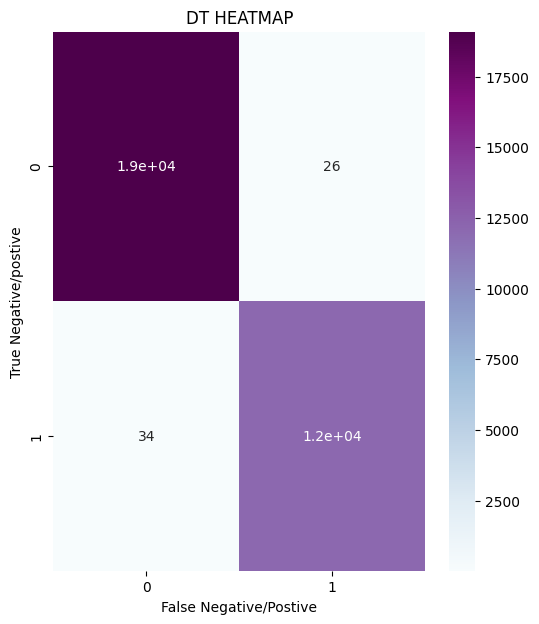

In [ ]:
plt.figure(figsize = (6,7))
sns.heatmap(cmdt, annot=True,cmap="BuPu")
plt.title('DT HEATMAP')
plt.xlabel('False Negative/Postive')
plt.ylabel('True Negative/postive')

In [ ]:
#classificationSVM=svm.SVC(kernel='linear')
#classificationSVM.fit(x_train, y_train)
#y_predsvm=classificationSVM.predict(x_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_predsvm))
#print("Prescion:",metrics.precision_score(y_test, y_predsvm,pos_label=1))
#print("Recall:",metrics.recall_score(y_test, y_predsvm,pos_label=1))
#print("Fmeasure:",metrics.f1_score(y_test, y_predsvm,pos_label=1))
#cm2=metrics.confusion_matrix(y_test, y_predsvm)

Voting algorithm is applied

In [26]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('knn', knn), ('rf', rf_classifier),('dt', dt)], voting='hard')
voting_clf.fit(x_train, y_train)
y_predv = voting_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predv))
print("Prescion:",metrics.precision_score(y_test, y_predv,pos_label=1))
print("Recall:",metrics.recall_score(y_test, y_predv,pos_label=1))
print("Fmeasure:",metrics.f1_score(y_test, y_predv,pos_label=1))


Accuracy: 0.9979285208590083
Prescion: 0.9987840338355802
Recall: 0.9970445429596791
Fmeasure: 0.9979135303594537


Text(45.722222222222214, 0.5, 'True Negative/postive')

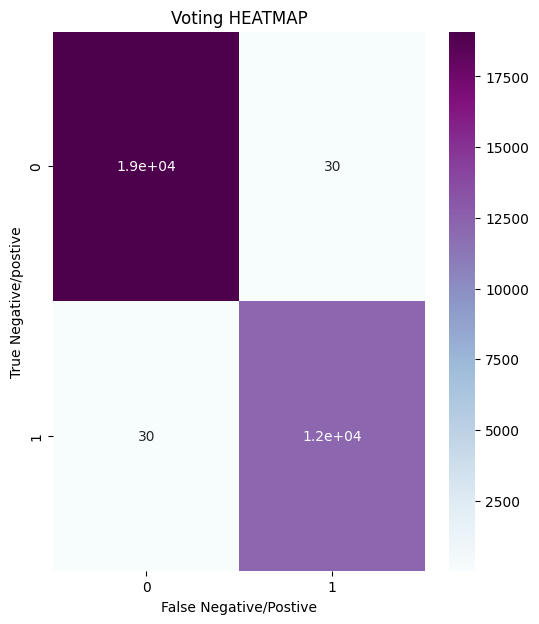

In [ ]:
cmv=metrics.confusion_matrix(y_test, y_predv)
plt.figure(figsize = (6,7))
sns.heatmap(cmv, annot=True,cmap="BuPu")
plt.title('Voting HEATMAP')
plt.xlabel('False Negative/Postive')
plt.ylabel('True Negative/postive')